In [36]:
import keras
from keras.datasets import mnist
from keras.optimizers import Adam
from keras.models import Model, model_from_json
import numpy as np
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline# https://github.com/tensorpack/tensorpack/tree/master/examples/FasterRCNN

In [9]:
# MNISTデータを読込む
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train[:, :, :, np.newaxis]
x_test = x_test[:, :, :, np.newaxis]
# one-hot化
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [10]:
# モデル読み込み
json_string = open("my_model.json").read()
model = model_from_json(json_string)
# 重み読み込み
model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])
model.load_weights("my_model_weights.h5")

In [11]:
# 検証
score = model.evaluate(x_test, y_test, verbose=1)
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 3s 329us/step

Test loss: 0.03229711304324173
Test accuracy: 0.9906


In [60]:
# 予測
predicts = model.predict(x_test)

In [61]:
# 間違えた画像を調査
predics_categoly = predicts.argmax(axis = 1)
acctuary_categoly = y_test.argmax(axis = 1)
worong = (predics_categoly != acctuary_categoly)
index = np.where(worong == True)
print(index)

(array([ 115,  175,  247,  445,  449,  646,  659,  674,  684,  947, 1014,
       1039, 1112, 1226, 1232, 1242, 1247, 1260, 1337, 1393, 1522, 1527,
       1621, 1900, 1901, 2035, 2053, 2070, 2098, 2109, 2130, 2182, 2186,
       2266, 2293, 2308, 2387, 2462, 2488, 2597, 2894, 2896, 3005, 3225,
       3330, 3503, 3534, 3558, 3601, 3681, 3726, 3767, 3780, 3808, 3850,
       3941, 4148, 4199, 4575, 4740, 4783, 4807, 4879, 4911, 4956, 4997,
       5331, 5937, 5955, 5973, 5997, 6400, 6555, 6571, 6572, 6576, 6597,
       6625, 6651, 6744, 6783, 6883, 7434, 8094, 8376, 8520, 8527, 9009,
       9015, 9664, 9679, 9692, 9729, 9770], dtype=int64),)


acctuary:5   predict:6


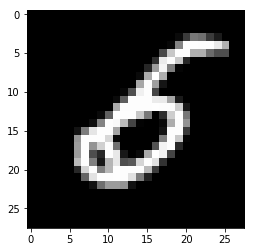

In [62]:
num_index = 9729
print("acctuary:%d   predict:%d" % (acctuary_categoly[num_index], predics_categoly[num_index]))
plt.imshow(x_test[num_index].reshape(28, 28), cmap='gray')
plt.show()

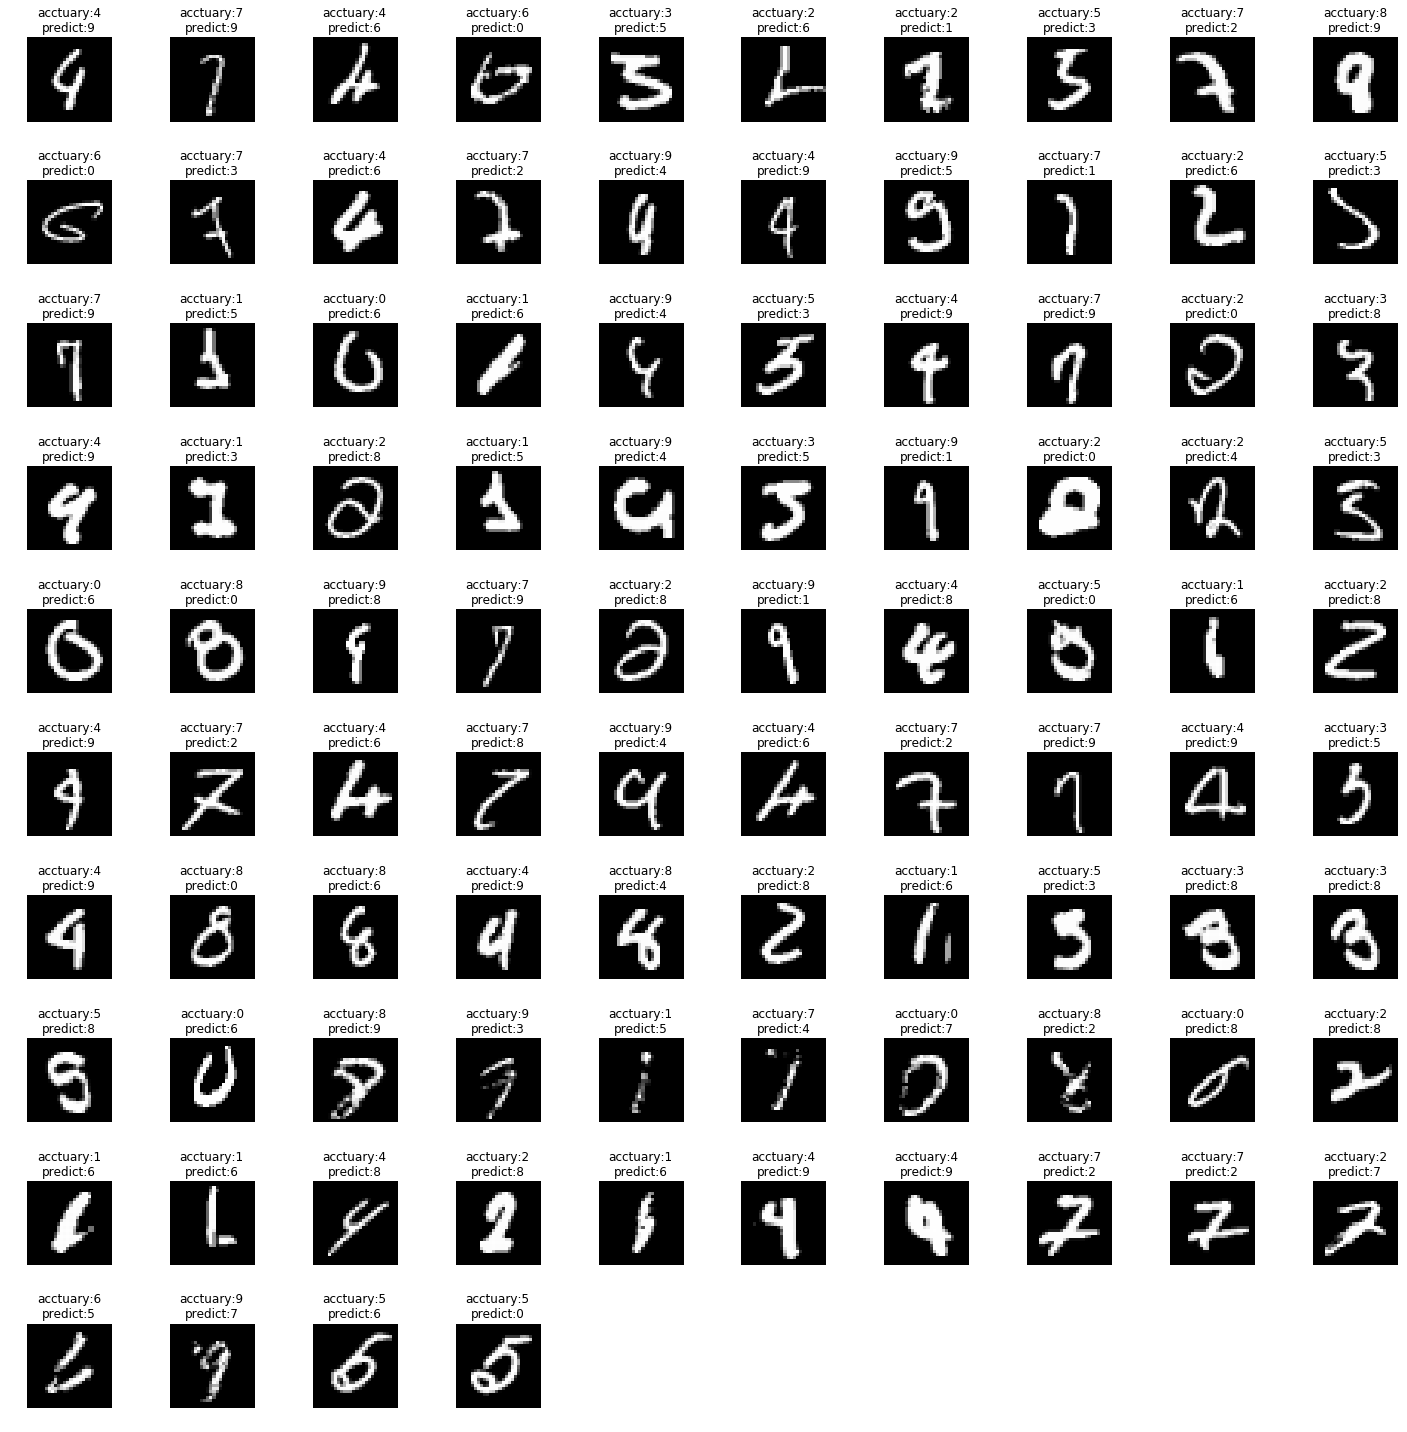

In [83]:
height = len(index[0]) / 10 + 1
fig = plt.figure(figsize=(20, 20))
for i in range(len(index[0])):
    plt.subplot(height, 10, i+1)
    plt.title("acctuary:%d\npredict:%d" % (acctuary_categoly[index[0][i]], predics_categoly[index[0][i]]))
    plt.axis("off")
    plt.imshow(x_test[index[0][i]].reshape(28, 28), cmap='gray')
plt.tight_layout()